# Lab 8 Semantic Analysis Part 1

In this notebook, you learn how to use the follwoing techniques to do sentiment analysis:
  * Naive Bayes
  

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/Lab8

/content/drive/MyDrive/Lab8


In [3]:
from heading import *
from nltk.tokenize import *
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## Tokenization

The following focuses on reading the positive and the negative adat files using `open()` and then tokenize those lines into words sepereated for the positives and for the negatives using the `word_tokenize()` which tokenizes the data file

In [4]:
short_pos = open("text_data/positives.txt","r").read() # opens , reads, and saves the postive data file
short_neg = open("text_data/negatives.txt","r").read() # opens , reads, and saves the negative data file

In [5]:
short_pos_words = word_tokenize(short_pos) # Tokenizes the postive data file and saves it
short_neg_words = word_tokenize(short_neg) # Tokenizes the negative data file and saves it

## Bag Of Words

The Bag of words focuses on applying frequency for every word and focuses on creating the feature table which will be utilised by the naive bayes

Adds the positive and negative word tokens into one list

In [6]:
all_words = [] # Create  a list

# Loop over the tokenized positive words and add them in the list
for w in short_pos_words:
    all_words.append(w.lower())

# Loop over the tokenized negative words and add them in the list
for w in short_neg_words:
    all_words.append(w.lower())

Adds the frequency for every single word token using `nltk.FreqDist()` which gets the frequency for every single word

In [7]:
all_words = nltk.FreqDist(all_words) # Saves the frequency along with the word as a list of tuple

In [8]:
print(all_words.most_common(15)) # Displays the 15 most common words

[('it', 4), ('this', 4), ('is', 4), ('great', 3), ('good', 3), ('not', 3), ('!', 2), ('much', 2), (',', 2), ('would', 2), ('my', 2), ('really', 2), ('the', 2), ('very', 2), ('done', 2)]


In [9]:
word_features = list(all_words.keys())[:50] # get the first 50 words

Goes line by line and saves each sentence along with whether its positive or negative

In [10]:
documents = [] # Creates document list

# loops over the positive data file line by line and saves the line along with being positive as a tuple
for r in short_pos.split('\n'):
    documents.append( (r, "pos") )

# loops over the negative data file line by line and saves the line along with being negative as a tuple
for r in short_neg.split('\n'):
    documents.append( (r, "neg") )

`extract_features()` is one of the main functions used by the Bag Of Words which saves the word along if its found within the line and saves it as either postive or negative based on the context it is in. This will be used by the Naive Bayes to determine whether a sentence is positive or negative

In [11]:
featuresets = extract_features(documents, word_features) # Saves the words as a dictionary along if they are found or not and saves them as either positive or negative senctence

In [12]:
training_set = featuresets[:15] # Take the first 15 for training the data from extract_features
testing_set =  featuresets[16:] # Take the the others as testing data from extract_features

##Naive Bayes

**Naive Bayes**

Naive Bayes is one method of finding out whether the sentence is positive or negative based on specific calculations and based on the extract feature table which was discussed above.

**Naive Bayes on Solving the Targeted Problem**

The following formula is used to help find out whether the sentence is positive or negative:

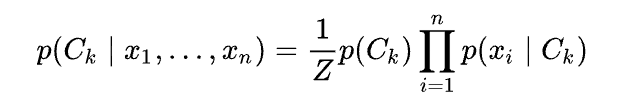

This formula is consists of finding out the probability of postive first multiplied by the products of probabilities of words which are also positives so in that case `P(Positive|Sentence)*= P(word|Positive)` and the same thing is done but for negative in which `P(Negative|Sentence)*= P(word|Negative)` after that you compare `P(Positive|Sentence)` with `P(Negative|Sentence)` and whichever is larger is the answer

**Example**

Let us say someone inputs the sentence "This product is amazing" then Positive Probability Values:

P(this|Positive) = 2/6,
P(Product|Positive) = 1/6,
P(is| Positive) = 2/6,
P(amazing| Positive) = 1/6  
</b>

Negative Probability Values:

P(this|Negative) = 2/7
P(Product|Negative) = 2/7
P(is| Negative) = 1/7
P(amazing| Negative) = 0  

</b>

**Total Probability for Positive:** P(Positive|sentence) = 0.5×2/6×1/6​×62​×61​
</b>

**Total Probability for Negative:** P(Negative|sentence) = 0
</b>

Since P(Positive|sentence) > P(Negative|sentence) then "This product is amazing" is a positive sentence




In [13]:
classifier = nltk.NaiveBayesClassifier.train(training_set) # Trains the niave bayes based on the extract feature

In [14]:
print("Original Naive Bayes Algo accuracy percent:", (nltk.classify.accuracy(classifier, testing_set))*100) # Tests the accuracy of naive bayes

Original Naive Bayes Algo accuracy percent: 57.14285714285714


Here, you can input one sentence to predict whether it is positive or negative.

e.g. "This place is nice."
e.g. "This is not good"

In [17]:
classifier.classify(word_feats(input("Input one sentence"))) # Gets the user input sentence and predicts whether it is a positive or negative sentence

Input one sentencethis is not good


'neg'